In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../Data/Intermediate/CDCSTDoverall2000_2020_processed.csv")

In [3]:
data.head()
data.drop(columns=["Unnamed: 0"])

,year,fips,cases_chlamydia,cases_early_non-primary_non-secondary_syphilis,cases_gonorrhea,cases_primary_and_secondary_syphilis,rate_per_100000_chlamydia,rate_per_100000_early_non-primary_non-secondary_syphilis,rate_per_100000_gonorrhea,rate_per_100000_primary_and_secondary_syphilis,...,rate_per_100000_male_gonorrhea_multiracial,rate_per_100000_male_gonorrhea_native_hawaiian_other_pacific_islander,rate_per_100000_male_gonorrhea_white,rate_per_100000_male_primary_and_secondary_syphilis_american_indian_alaska_native,rate_per_100000_male_primary_and_secondary_syphilis_asian,rate_per_100000_male_primary_and_secondary_syphilis_black_african_american,rate_per_100000_male_primary_and_secondary_syphilis_hispanic_latino,rate_per_100000_male_primary_and_secondary_syphilis_multiracial,rate_per_100000_male_primary_and_secondary_syphilis_native_hawaiian_other_pacific_islander,rate_per_100000_male_primary_and_secondary_syphilis_white
0,2000,45001,61.0,1.0,57.0,2.0,232.6,3.8,217.4,7.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,22001,0.0,8.0,0.0,11.0,0.0,13.6,0.0,18.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,51001,153.0,2.0,88.0,0.0,398.7,5.2,229.3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,16001,644.0,0.0,33.0,1.0,212.3,0.0,10.9,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,19001,8.0,0.0,0.0,0.0,97.6,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67581,2020,4027,982.0,19.0,192.0,4.0,459.3,8.9,89.8,1.9,...,79.9,NaN,38.4,0.0,0.0,0.0,2.9,0.0,0.0,3.0
67582,2020,8125,14.0,0.0,1.0,0.0,139.7,0.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67583,2020,48505,46.0,0.0,4.0,0.0,324.4,0.0,28.2,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
67584,2020,48507,42.0,0.0,11.0,0.0,354.7,0.0,92.9,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_sum = data.groupby(['year'])['cases_gonorrhea','cases_chlamydia','cases_early_non-primary_non-secondary_syphilis','cases_primary_and_secondary_syphilis'].sum().reset_index()

C:\Users\philb\AppData\Local\Temp\ipykernel_18284\3700150800.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sum = data.groupby(['year'])['cases_gonorrhea','cases_chlamydia','cases_early_non-primary_non-secondary_syphilis','cases_primary_and_secondary_syphilis'].sum().reset_index()


In [5]:
df_sum.head()
df_sum = df_sum[df_sum.year >= 2002]

C:\Users\philb\AppData\Local\Temp\ipykernel_18284\2141027393.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


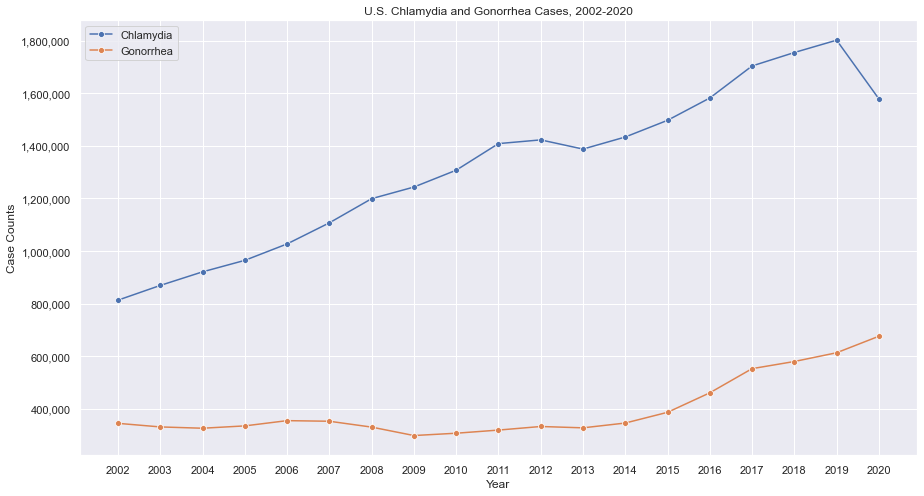

In [6]:
sns.set_theme()
plt.figure(figsize = (15,8))
g = sns.lineplot(data = df_sum, x = 'year', y = 'cases_chlamydia',marker = "o")
sns.lineplot(data = df_sum, x = 'year', y = 'cases_gonorrhea',marker = "o")
g.set_ylabel('Case Counts')
g.set_xlabel('Year')
g.set_xticks(df_sum['year'])
g.set_title("U.S. Chlamydia and Gonorrhea Cases, 2002-2020")
plt.legend(labels=["Chlamydia","Gonorrhea"])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.savefig('../Output/PosterPresentation/cases_chlamydia_gonorrhea.png',dpi=300)
plt.show()

C:\Users\philb\AppData\Local\Temp\ipykernel_18284\2272062883.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


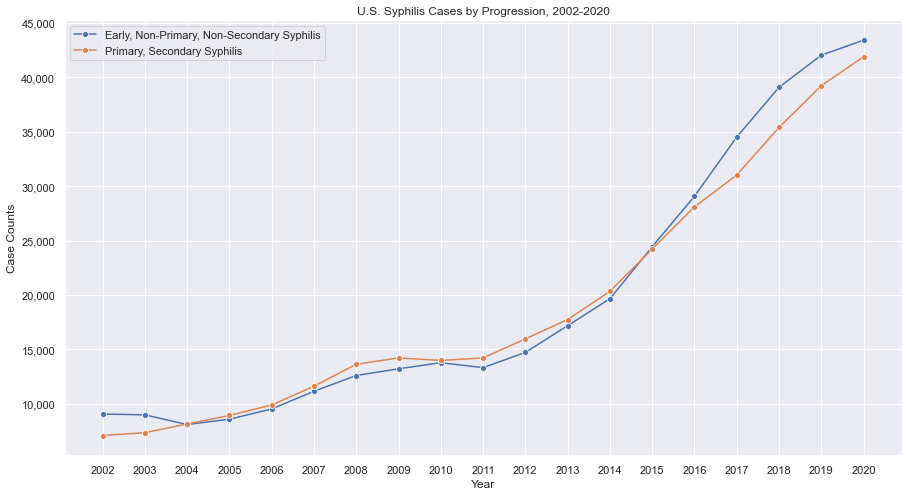

In [7]:
plt.figure(figsize = (15,8))
g = sns.lineplot(data = df_sum, x = 'year', y = 'cases_early_non-primary_non-secondary_syphilis',marker = "o")
sns.lineplot(data = df_sum, x = 'year', y = 'cases_primary_and_secondary_syphilis', marker = "o")
g.set_ylabel('Case Counts')
g.set_xlabel('Year')
g.set_xticks(df_sum['year'])
g.set_title("U.S. Syphilis Cases by Progression, 2002-2020")
plt.legend(labels=["Early, Non-Primary, Non-Secondary Syphilis","Primary, Secondary Syphilis"])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.savefig('../Output/PosterPresentation/cases_syphilis.png',dpi=300)
plt.show()